In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = '/content/drive/MyDrive/CCRI/ccri_repo/data'
source_folder = f"{data_dir}/CCRI_results_misc/"


df_P1 = pd.read_csv(os.path.join(source_folder, 'Merged_Exposure_Data.csv'))
df_P2 = pd.read_csv(os.path.join(source_folder, 'P2_Merged_Normalized_avg.csv'))


In [4]:
df_P1.columns

Index(['iso3', 'adm0_name', 'air_pollution_absolute', 'air_pollution_relative',
       'agricultural_drought_absolute', 'agricultural_drought_relative',
       'drought_spi_absolute', 'drought_spi_relative', 'drought_spei_absolute',
       'drought_spei_relative', 'coastal_flood_absolute',
       'coastal_flood_relative', 'extreme_heat_absolute',
       'extreme_heat_relative', 'fire_frequency_absolute',
       'fire_frequency_relative', 'fire_FRP_absolute', 'fire_FRP_relative',
       'heatwave_duration_absolute', 'heatwave_duration_relative',
       'heatwave_frequency_absolute', 'heatwave_frequency_relative',
       'heatwave_severity_absolute', 'heatwave_severity_relative',
       'river_flood_absolute', 'river_flood_relative',
       'tropical_storm_absolute', 'tropical_storm_relative',
       'sand_dust_absolute', 'sand_dust_relative',
       'vectorborne_malariapf_absolute', 'vectorborne_malariapf_relative',
       'vectorborne_malariapv_absolute', 'vectorborne_malariapv_relativ

In [5]:
df_P2.columns

Index(['iso3', 'P2_electricity_access_value_normalized',
       'P2_DTP1_access_value_normalized', 'P2_DTP3_access_value_normalized',
       'P2_Skilled_birth_coverage_value_normalized',
       'P2_Stunting_value_normalized',
       'P2_Child_Food_Poverty_value_normalized',
       'P2_Lower_secondary_out_of_school_value_normalized',
       'P2_Lower_secondary_completion_rate_value_normalized',
       'P2_Learning_poverty_value_normalized',
       'P2_Child_labor_value_normalized', 'P2_Child_marriage_value_normalized',
       'P2_Child_poverty_value_normalized',
       'P2_Under_five_covered_by_social_protection_value_normalized',
       'P2_Under_five_mortality_value_normalized',
       'P2_Basic_hygiene_value_normalized',
       'P2_At-least_basic_drinking_water_value_normalized',
       'P2_At-least_basic_sanitation_value_normalized', 'P2_arithmetic_avg',
       'rank_reverse'],
      dtype='object')

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import gmean
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# Assume df_P1 is already defined

# Group definitions based on prefixes
hazard_groups = {
    'river_flood': ['river_flood'],
    'coastal_flood': ['coastal_flood'],
    'storm': ['tropical_storm'],
    'drought': ['agricultural_drought', 'drought_spei', 'drought_spi'],
    'heatwave': ['heatwave_frequency', 'heatwave_duration', 'heatwave_severity'],
    'extreme_heat': ['extreme_heat'],#version with only frequncy and extreme heat
    'fire': ['fire_FRP', 'fire_frequency'],
    'sand_dust': ['sand_dust'],
    'air_pollution': ['air_pollution'],
    'malaria': ['vectorborne_malariapv', 'vectorborne_malariapf']
}

# Calculate geometric mean for absolute-relative pairs, then normalize
group_mean_columns = []

for group, hazards in hazard_groups.items():
    group_means = []
    for hazard in hazards:
        abs_col = f"{hazard}_absolute"
        rel_col = f"{hazard}_relative"
        mean_col = f"{hazard}_mean"

        df_P1[mean_col] = df_P1[[abs_col, rel_col]].apply(
            lambda row: gmean(row.replace(0, np.nan).dropna()) if len(row.replace(0, np.nan).dropna()) > 0 else np.nan,
            axis=1
        )

        group_means.append(mean_col)

    # Calculate geometric mean within the group
    group_col = f"{group}_gmean"
    df_P1[group_col] = df_P1[group_means].apply(
        lambda row: gmean(row.replace(0, np.nan).dropna()) if len(row.replace(0, np.nan).dropna()) > 0 else np.nan,
        axis=1
    )

    group_mean_columns.append(group_col)

# Calculate overall geometric mean across groups
df_P1['P1_geometric_avg'] = df_P1[group_mean_columns].apply(
    lambda row: gmean(row.replace(0, np.nan).dropna()) if len(row.replace(0, np.nan).dropna()) > 0 else np.nan,
    axis=1
)

In [7]:
df_P1[group_mean_columns]

river_flood_gmean  coastal_flood_gmean  storm_gmean  drought_gmean  \
0             1.000000             1.000000     8.145309       1.745569   
1             1.000000             1.000000     5.409611       1.000000   
2             1.000000             6.714058     1.000000       1.000000   
3             1.000000             6.454795     7.091184       1.000000   
4             1.000000             2.997660     1.000000       3.981567   
..                 ...                  ...          ...            ...   
190           2.033911             2.561273     8.846722       5.457364   
191           1.917615             2.031043     8.488323       1.761496   
192           1.000000             1.000000     7.495003       1.517317   
193           2.188129             2.090661     9.084218       3.052220   
194           1.000000             3.732178     7.796395       1.903043   

     heatwave_gmean  extreme_heat_gmean  fire_gmean  sand_dust_gmean  \
0          1.986802            1.000000    2.092020         1.000000   
1          1.636939            1.000000    1.000000         1.000000   
2          1.909351            1.000000    1.000000         2.517657   
3          1.805224            1.000000    1.000000         1.000000   
4          2.002412            7.947091    1.000000         3.112760   
..              ...                 ...         ...              ...   
190        2.274689            4.213553    4.089241         1.924012   
191        2.024283            1.000000    3.034631         1.000000   
192        1.918278            1.000000    1.000000         1.000000   
193        2.081024            2.640960    2.255237         2.174837   
194        1.983526            1.000000    1.883340         1.549936   

     air_pollution_gmean  malaria_gmean  
0               6.409304        1.00000  
1               1.000000        1.00000  
2               1.159345        1.00000  
3               1.000000        1.00000  
4               4.994435        1.00000  
..                   ...            ...  
190             8.553453        1.00000  
191             8.098805        1.00000  
192             6.039515        1.00000  
193             8.842275        2.68779  
194             5.523531        1.00000  

[195 rows x 10 columns]

In [8]:
p1_group_mean = pd.concat([df_P1[['iso3','adm0_name'] + group_mean_columns]], axis=1)
p1_group_mean.to_csv(os.path.join(source_folder, "p1_group_mean.csv"), index=False)

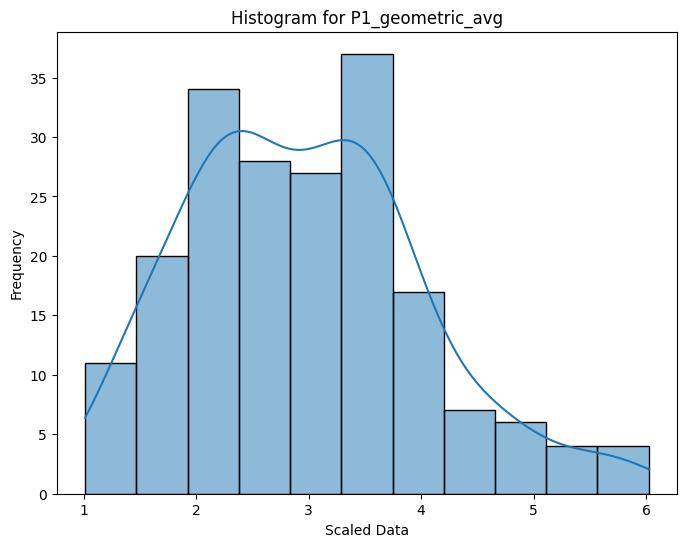

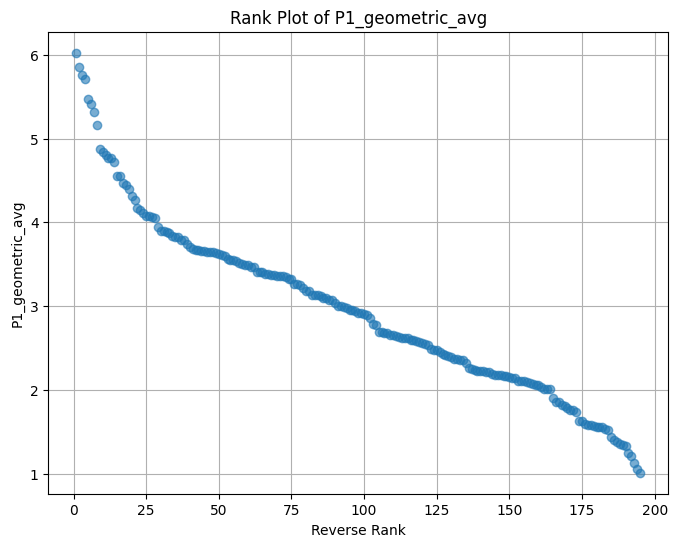

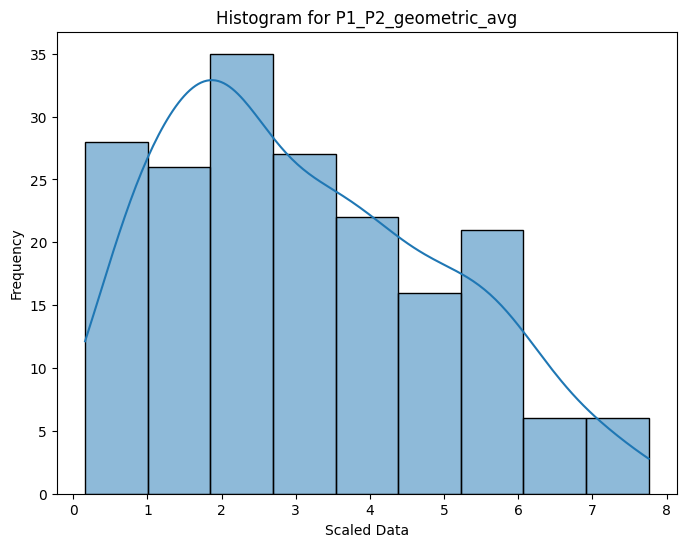

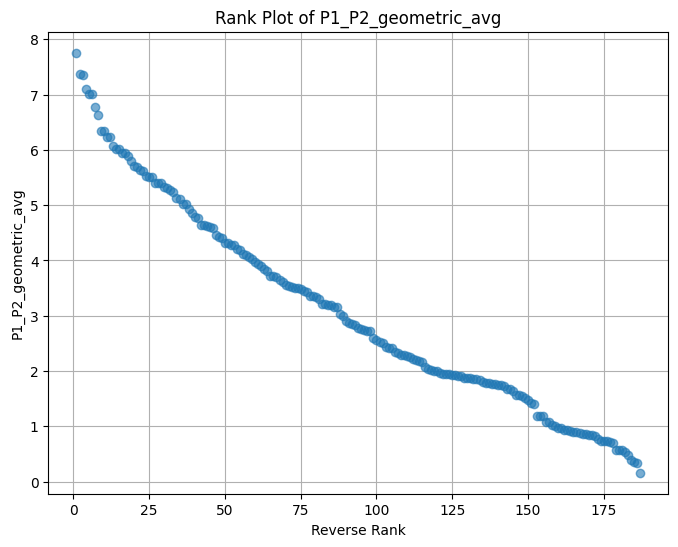

In [9]:

# Plot histogram and normality check
plt.figure(figsize=(8, 6))
sns.histplot(df_P1['P1_geometric_avg'], kde=True)
plt.title(f"Histogram for P1_geometric_avg")
plt.xlabel("Scaled Data")
plt.ylabel("Frequency")
plt.show()

# Compute ranks in reverse order
df_P1['rank_reverse'] = df_P1['P1_geometric_avg'].rank(method='average', ascending=False)
plt.figure(figsize=(8, 6))
plt.plot(df_P1['rank_reverse'], df_P1['P1_geometric_avg'], marker='o', linestyle='', alpha=0.6)
plt.xlabel("Reverse Rank")
plt.ylabel("P1_geometric_avg")
plt.title(f"Rank Plot of P1_geometric_avg")
plt.grid(True)
plt.show()


# Apply Min-Max scaling to 'P1_geometric_avg' based on the plot
# q5 = df_P1['P1_geometric_avg'].quantile(0.05)
# q95 = df_P1['P1_geometric_avg'].quantile(0.95)
# df_P1['P1_geometric_avg'] = np.clip(df_P1['P1_geometric_avg'], q5, q95)

# Scale the 'P1_geometric_avg' column to range from 0 to 10
scaler = MinMaxScaler(feature_range=(0, 10))  # scale to 0–10
df_P1['P1_geometric_avg'] = scaler.fit_transform(df_P1[['P1_geometric_avg']]).flatten()


# Step 3: Group by 'ISO3' and calculate the average of 'P1_geometric_avg' for each 'ISO3'
df_P1_grouped = df_P1.groupby('iso3', as_index=False)['P1_geometric_avg'].mean()

# Step 4: Merge df_P1_grouped with df_P2 on 'ISO3'
merged_df = df_P1_grouped.merge(df_P2[['iso3', 'P2_arithmetic_avg']], left_on='iso3', right_on='iso3', how='left')

# Step 5: Calculate the Geometric Mean between 'P1_geometric_avg' and 'P2_arithmetic_avg'

merged_df['P1_P2_geometric_avg'] = merged_df.apply(
    lambda row: gmean([
        row['P1_geometric_avg'] + 1e-10,
        row['P2_arithmetic_avg'] + 1e-10
    ]) if not np.isnan(row['P1_geometric_avg']) and not np.isnan(row['P2_arithmetic_avg']) else np.nan,
    axis=1
)

# Plot histogram and normality check
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['P1_P2_geometric_avg'], kde=True)
plt.title(f"Histogram for P1_P2_geometric_avg")
plt.xlabel("Scaled Data")
plt.ylabel("Frequency")
plt.show()

# Compute ranks in reverse order
merged_df['rank_reverse'] = merged_df['P1_P2_geometric_avg'].rank(method='average', ascending=False)
plt.figure(figsize=(8, 6))
plt.plot(merged_df['rank_reverse'], merged_df['P1_P2_geometric_avg'], marker='o', linestyle='', alpha=0.6)
plt.xlabel("Reverse Rank")
plt.ylabel("P1_P2_geometric_avg")
plt.title(f"Rank Plot of P1_P2_geometric_avg")
plt.grid(True)
plt.show()


In [10]:
merged_df['P1_geometric_avg']

0      5.759581
1      5.635018
2      2.953455
3      1.127055
4      4.967997
         ...   
190    1.497180
191    6.305266
192    5.618174
193    4.115469
194    5.091799
Name: P1_geometric_avg, Length: 195, dtype: float64

In [11]:
merged_df['P2_arithmetic_avg']

0      6.018729
1      6.532829
2      1.035029
3      2.195000
4      2.531732
         ...   
190    2.320182
191    5.128652
192    3.326011
193    4.847691
194    4.456571
Name: P2_arithmetic_avg, Length: 195, dtype: float64

In [12]:

# #final clip and normalization!!!
# q5 = merged_df['P1_P2_geometric_avg'].quantile(0.05)
# q95 = merged_df['P1_P2_geometric_avg'].quantile(0.95)
# merged_df['P1_P2_geometric_avg'] = np.clip(merged_df['P1_P2_geometric_avg'], q5, q95)

# # Scale the 'P1_p2_geometric_avg' column to range from 0 to 10
# scaler = MinMaxScaler(feature_range=(0, 10))  # scale to 0–10
# merged_df['P1_P2_geometric_avg'] = scaler.fit_transform(merged_df[['P1_P2_geometric_avg']]).flatten()


# Now 'merged_df' contains the scaled 'P1_p2_geometric_avg_scaled'
print(merged_df[['iso3', 'P1_geometric_avg', 'P2_arithmetic_avg', 'P1_P2_geometric_avg']])


    iso3  P1_geometric_avg  P2_arithmetic_avg  P1_P2_geometric_avg
0    AFG          5.759581           6.018729             5.887729
1    AGO          5.635018           6.532829             6.067340
2    ALB          2.953455           1.035029             1.748402
3    AND          1.127055           2.195000             1.572859
4    ARE          4.967997           2.531732             3.546496
..   ...               ...                ...                  ...
190  WSM          1.497180           2.320182             1.863794
191  YEM          6.305266           5.128652             5.686609
192  ZAF          5.618174           3.326011             4.322743
193  ZMB          4.115469           4.847691             4.466601
194  ZWE          5.091799           4.456571             4.763608

[195 rows x 4 columns]


In [13]:
merged_df.to_csv(os.path.join(source_folder,'p1_p2_avg_ccri.csv'), index=False)

In [14]:
import geopandas as gpd
import pandas as pd

# Load the GeoJSON file as a GeoDataFrame
geo_df = gpd.read_file(os.path.join(source_folder,'georepo_adm0.gpkg'))


In [15]:
#geo_df.drop(columns=['child_population', 'child_population_gpw'], inplace=True)
geo_df = geo_df[['ISO3', 'uuid', 'name', 'geometry']]

In [16]:
geo_df

ISO3                                  uuid                  name  \
0    ALB  b9d8dcda-24d6-45e0-9ccd-170204c795c8               Albania   
1    xAC  c17ddae9-99f7-474d-8d8e-a11d5717d4ad            Aksai Chin   
2    AFG  f82a5059-81e7-4d93-8adb-7b1cc1b40a49           Afghanistan   
3    ASM  8fd5c3cc-5684-4cf9-99f9-292fbd38df70  American Samoa (USA)   
4    ABW  89fed2b1-2a7d-4571-8e1f-fb1bb67c1f0d                 Aruba   
..   ...                                   ...                   ...   
284  SDN  c2d0710f-abbd-4d68-a42e-a1fa8b7b8a14      Hala'ib Triangle   
285  MDA  3cdfbd13-7e79-4273-9535-283af0e32244               Moldova   
286  DJI  9d0d0ac2-5084-45b8-9cf4-1f4866dea03e              Djibouti   
287  BRB  e69e2500-40af-41da-9959-688be973bdaa              Barbados   
288  FRA  e1150395-571d-460a-8562-5f3f1bff2ac7                France   

                                              geometry  
0    MULTIPOLYGON (((19.74975 42.6283, 19.74977 42....  
1    MULTIPOLYGON (((79.34762 35.98677, 79.35047 35...  
2    MULTIPOLYGON (((71.00146 38.47707, 71.00709 38...  
3    MULTIPOLYGON (((-170.67153 -14.24442, -170.673...  
4    MULTIPOLYGON (((-69.87227 12.44098, -69.86875 ...  
..                                                 ...  
284  MULTIPOLYGON (((35.67121 22.98131, 35.67494 22...  
285  MULTIPOLYGON (((27.6071 48.45561, 27.6135 48.4...  
286  MULTIPOLYGON (((42.54047 11.53373, 42.53767 11...  
287  MULTIPOLYGON (((-59.6126 13.33497, -59.61229 1...  
288  MULTIPOLYGON (((2.5625 51.05841, 2.566 51.0462...  

[289 rows x 4 columns]

In [17]:
import glob
import os

data_dir = '/content/drive/MyDrive/CCRI/ccri_repo/data'
exposure_dir = f"{data_dir}/p1_exposure/"

exposure_file =  glob.glob(os.path.join(exposure_dir, '*.csv'))[0]
exposure_df = pd.read_csv(exposure_file)
exposure_df = exposure_df.groupby('iso3', as_index=False)[['child_population_exposed','child_population_total','population_total']].sum()
geo_df = geo_df.merge(exposure_df[['iso3','child_population_total','population_total']], left_on='ISO3', right_on='iso3', how='left')


In [18]:
geo_df

ISO3                                  uuid                  name  \
0    ALB  b9d8dcda-24d6-45e0-9ccd-170204c795c8               Albania   
1    xAC  c17ddae9-99f7-474d-8d8e-a11d5717d4ad            Aksai Chin   
2    AFG  f82a5059-81e7-4d93-8adb-7b1cc1b40a49           Afghanistan   
3    ASM  8fd5c3cc-5684-4cf9-99f9-292fbd38df70  American Samoa (USA)   
4    ABW  89fed2b1-2a7d-4571-8e1f-fb1bb67c1f0d                 Aruba   
..   ...                                   ...                   ...   
284  SDN  c2d0710f-abbd-4d68-a42e-a1fa8b7b8a14      Hala'ib Triangle   
285  MDA  3cdfbd13-7e79-4273-9535-283af0e32244               Moldova   
286  DJI  9d0d0ac2-5084-45b8-9cf4-1f4866dea03e              Djibouti   
287  BRB  e69e2500-40af-41da-9959-688be973bdaa              Barbados   
288  FRA  e1150395-571d-460a-8562-5f3f1bff2ac7                France   

                                              geometry iso3  \
0    MULTIPOLYGON (((19.74975 42.6283, 19.74977 42....  ALB   
1    MULTIPOLYGON (((79.34762 35.98677, 79.35047 35...  xAC   
2    MULTIPOLYGON (((71.00146 38.47707, 71.00709 38...  AFG   
3    MULTIPOLYGON (((-170.67153 -14.24442, -170.673...  ASM   
4    MULTIPOLYGON (((-69.87227 12.44098, -69.86875 ...  ABW   
..                                                 ...  ...   
284  MULTIPOLYGON (((35.67121 22.98131, 35.67494 22...  SDN   
285  MULTIPOLYGON (((27.6071 48.45561, 27.6135 48.4...  MDA   
286  MULTIPOLYGON (((42.54047 11.53373, 42.53767 11...  DJI   
287  MULTIPOLYGON (((-59.6126 13.33497, -59.61229 1...  BRB   
288  MULTIPOLYGON (((2.5625 51.05841, 2.566 51.0462...  FRA   

     child_population_total  population_total  
0              5.740381e+05      2.785088e+06  
1              3.438918e+03      1.340730e+04  
2              2.093993e+07      4.200699e+07  
3              1.560165e+04      4.168752e+04  
4              2.256240e+04      1.058404e+05  
..                      ...               ...  
284            2.346893e+07      4.987806e+07  
285            7.149056e+05      3.053511e+06  
286            4.097794e+05      1.121101e+06  
287            5.972141e+04      2.717817e+05  
288            1.329720e+07      6.560689e+07  

[289 rows x 7 columns]

In [19]:
geo_df.drop(columns=['iso3'], inplace=True)

In [20]:

# Ensure the key for merging is consistent (e.g., 'ISO3' in df_P1 and 'iso3' in df_P2)
# Merge with merged_df (use 'ISO3' from merged_df and 'iso3' from geo_df or merged_df as needed)

merged_geo_df = geo_df.merge(merged_df, left_on='ISO3', right_on='iso3', how='left')

if 'name' in df_P1.columns:
    df_P1 = df_P1.drop(columns=['name'])

# Ensure only numeric columns are included in the aggregation
numeric_cols = df_P1.select_dtypes(include=[np.number]).columns
df_P1 = df_P1.groupby('iso3', as_index=False)[numeric_cols].mean()


merged_geo_df = merged_geo_df.merge(df_P1, left_on='ISO3', right_on='iso3', how='left')
merged_geo_df = merged_geo_df.merge(df_P2, left_on='ISO3', right_on='iso3', how='left')
merged_geo_df = merged_geo_df.drop(columns=["iso3"])


# Save the merged GeoDataFrame as a new GeoJSON file
output_geojson = os.path.join(source_folder, 'p1_p2_avg_ccri.geojson')
merged_geo_df.to_file(output_geojson, driver='GeoJSON')

print(f"Merged GeoDataFrame saved to {output_geojson}")

Merged GeoDataFrame saved to /content/drive/MyDrive/CCRI/ccri_repo/data/CCRI_results_misc/p1_p2_avg_ccri.geojson


In [21]:
geo_df.columns

Index(['ISO3', 'uuid', 'name', 'geometry', 'child_population_total',
       'population_total'],
      dtype='object')

In [22]:
geo_df

ISO3                                  uuid                  name  \
0    ALB  b9d8dcda-24d6-45e0-9ccd-170204c795c8               Albania   
1    xAC  c17ddae9-99f7-474d-8d8e-a11d5717d4ad            Aksai Chin   
2    AFG  f82a5059-81e7-4d93-8adb-7b1cc1b40a49           Afghanistan   
3    ASM  8fd5c3cc-5684-4cf9-99f9-292fbd38df70  American Samoa (USA)   
4    ABW  89fed2b1-2a7d-4571-8e1f-fb1bb67c1f0d                 Aruba   
..   ...                                   ...                   ...   
284  SDN  c2d0710f-abbd-4d68-a42e-a1fa8b7b8a14      Hala'ib Triangle   
285  MDA  3cdfbd13-7e79-4273-9535-283af0e32244               Moldova   
286  DJI  9d0d0ac2-5084-45b8-9cf4-1f4866dea03e              Djibouti   
287  BRB  e69e2500-40af-41da-9959-688be973bdaa              Barbados   
288  FRA  e1150395-571d-460a-8562-5f3f1bff2ac7                France   

                                              geometry  \
0    MULTIPOLYGON (((19.74975 42.6283, 19.74977 42....   
1    MULTIPOLYGON (((79.34762 35.98677, 79.35047 35...   
2    MULTIPOLYGON (((71.00146 38.47707, 71.00709 38...   
3    MULTIPOLYGON (((-170.67153 -14.24442, -170.673...   
4    MULTIPOLYGON (((-69.87227 12.44098, -69.86875 ...   
..                                                 ...   
284  MULTIPOLYGON (((35.67121 22.98131, 35.67494 22...   
285  MULTIPOLYGON (((27.6071 48.45561, 27.6135 48.4...   
286  MULTIPOLYGON (((42.54047 11.53373, 42.53767 11...   
287  MULTIPOLYGON (((-59.6126 13.33497, -59.61229 1...   
288  MULTIPOLYGON (((2.5625 51.05841, 2.566 51.0462...   

     child_population_total  population_total  
0              5.740381e+05      2.785088e+06  
1              3.438918e+03      1.340730e+04  
2              2.093993e+07      4.200699e+07  
3              1.560165e+04      4.168752e+04  
4              2.256240e+04      1.058404e+05  
..                      ...               ...  
284            2.346893e+07      4.987806e+07  
285            7.149056e+05      3.053511e+06  
286            4.097794e+05      1.121101e+06  
287            5.972141e+04      2.717817e+05  
288            1.329720e+07      6.560689e+07  

[289 rows x 6 columns]

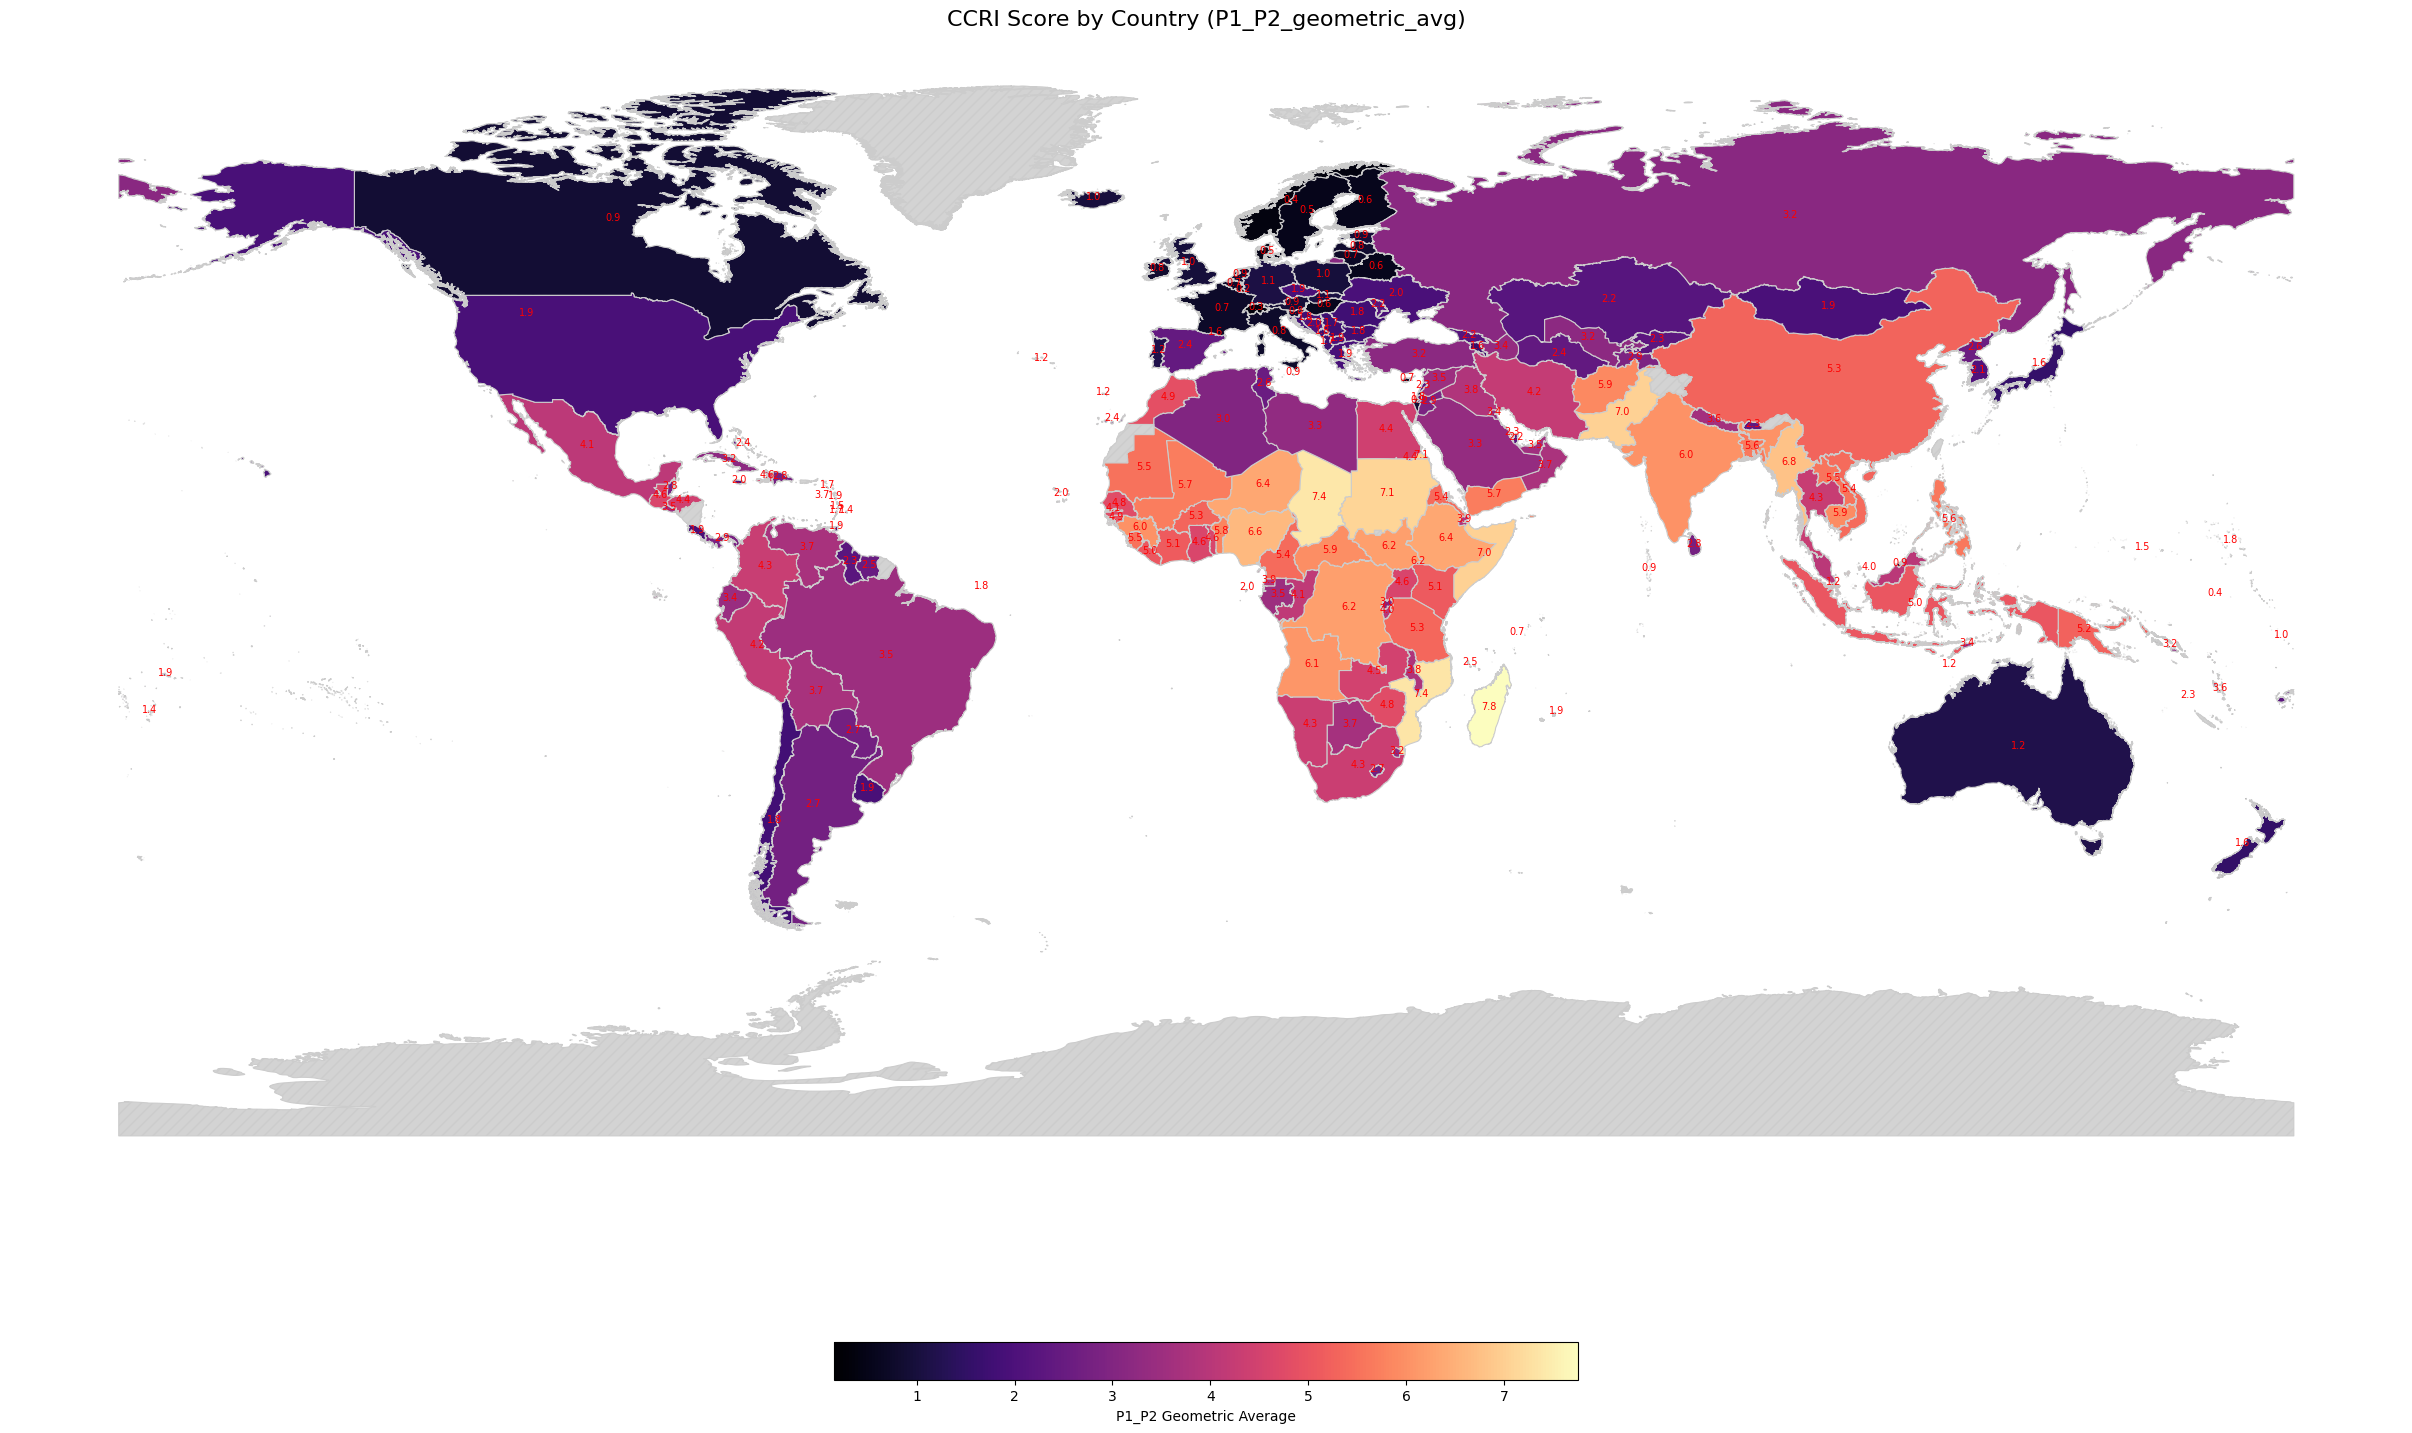

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd  # Just to be safe in case pd is not imported

fig, ax = plt.subplots(1, 1, figsize=(32, 20))
merged_geo_df.plot(
    column='P1_P2_geometric_avg',
    cmap='magma',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'shrink': 0.3,      # Reduce legend size
        'label': "P1_P2 Geometric Average",
        'orientation': "horizontal",
        'pad': 0.1
    },
    missing_kwds={
        'color': 'lightgray',       # Fill color for NaN
        'edgecolor': '0.8',         # Edge color for NaN polygons
        'hatch': '///',             # Optional: add pattern to differentiate
        'label': 'No data'
    }
)

# Add labels to non-NaN values
for idx, row in merged_geo_df.iterrows():
    if pd.notnull(row['P1_P2_geometric_avg']):
        centroid = row['geometry'].centroid
        ax.annotate(text=f"{row['P1_P2_geometric_avg']:.1f}", xy=(centroid.x, centroid.y),
                    horizontalalignment='center', fontsize=7, color='red')

# Add title and remove axis
plt.title('CCRI Score by Country (P1_P2_geometric_avg)', fontsize=16)
plt.axis('off')

# Optional: manually add legend entry for NaN
# ax.legend(handles=[Patch(facecolor='lightgray', label='No data')])

plt.show()


In [24]:
np.nanmean(merged_geo_df['P1_P2_geometric_avg'])

np.float64(3.1250851219228983)

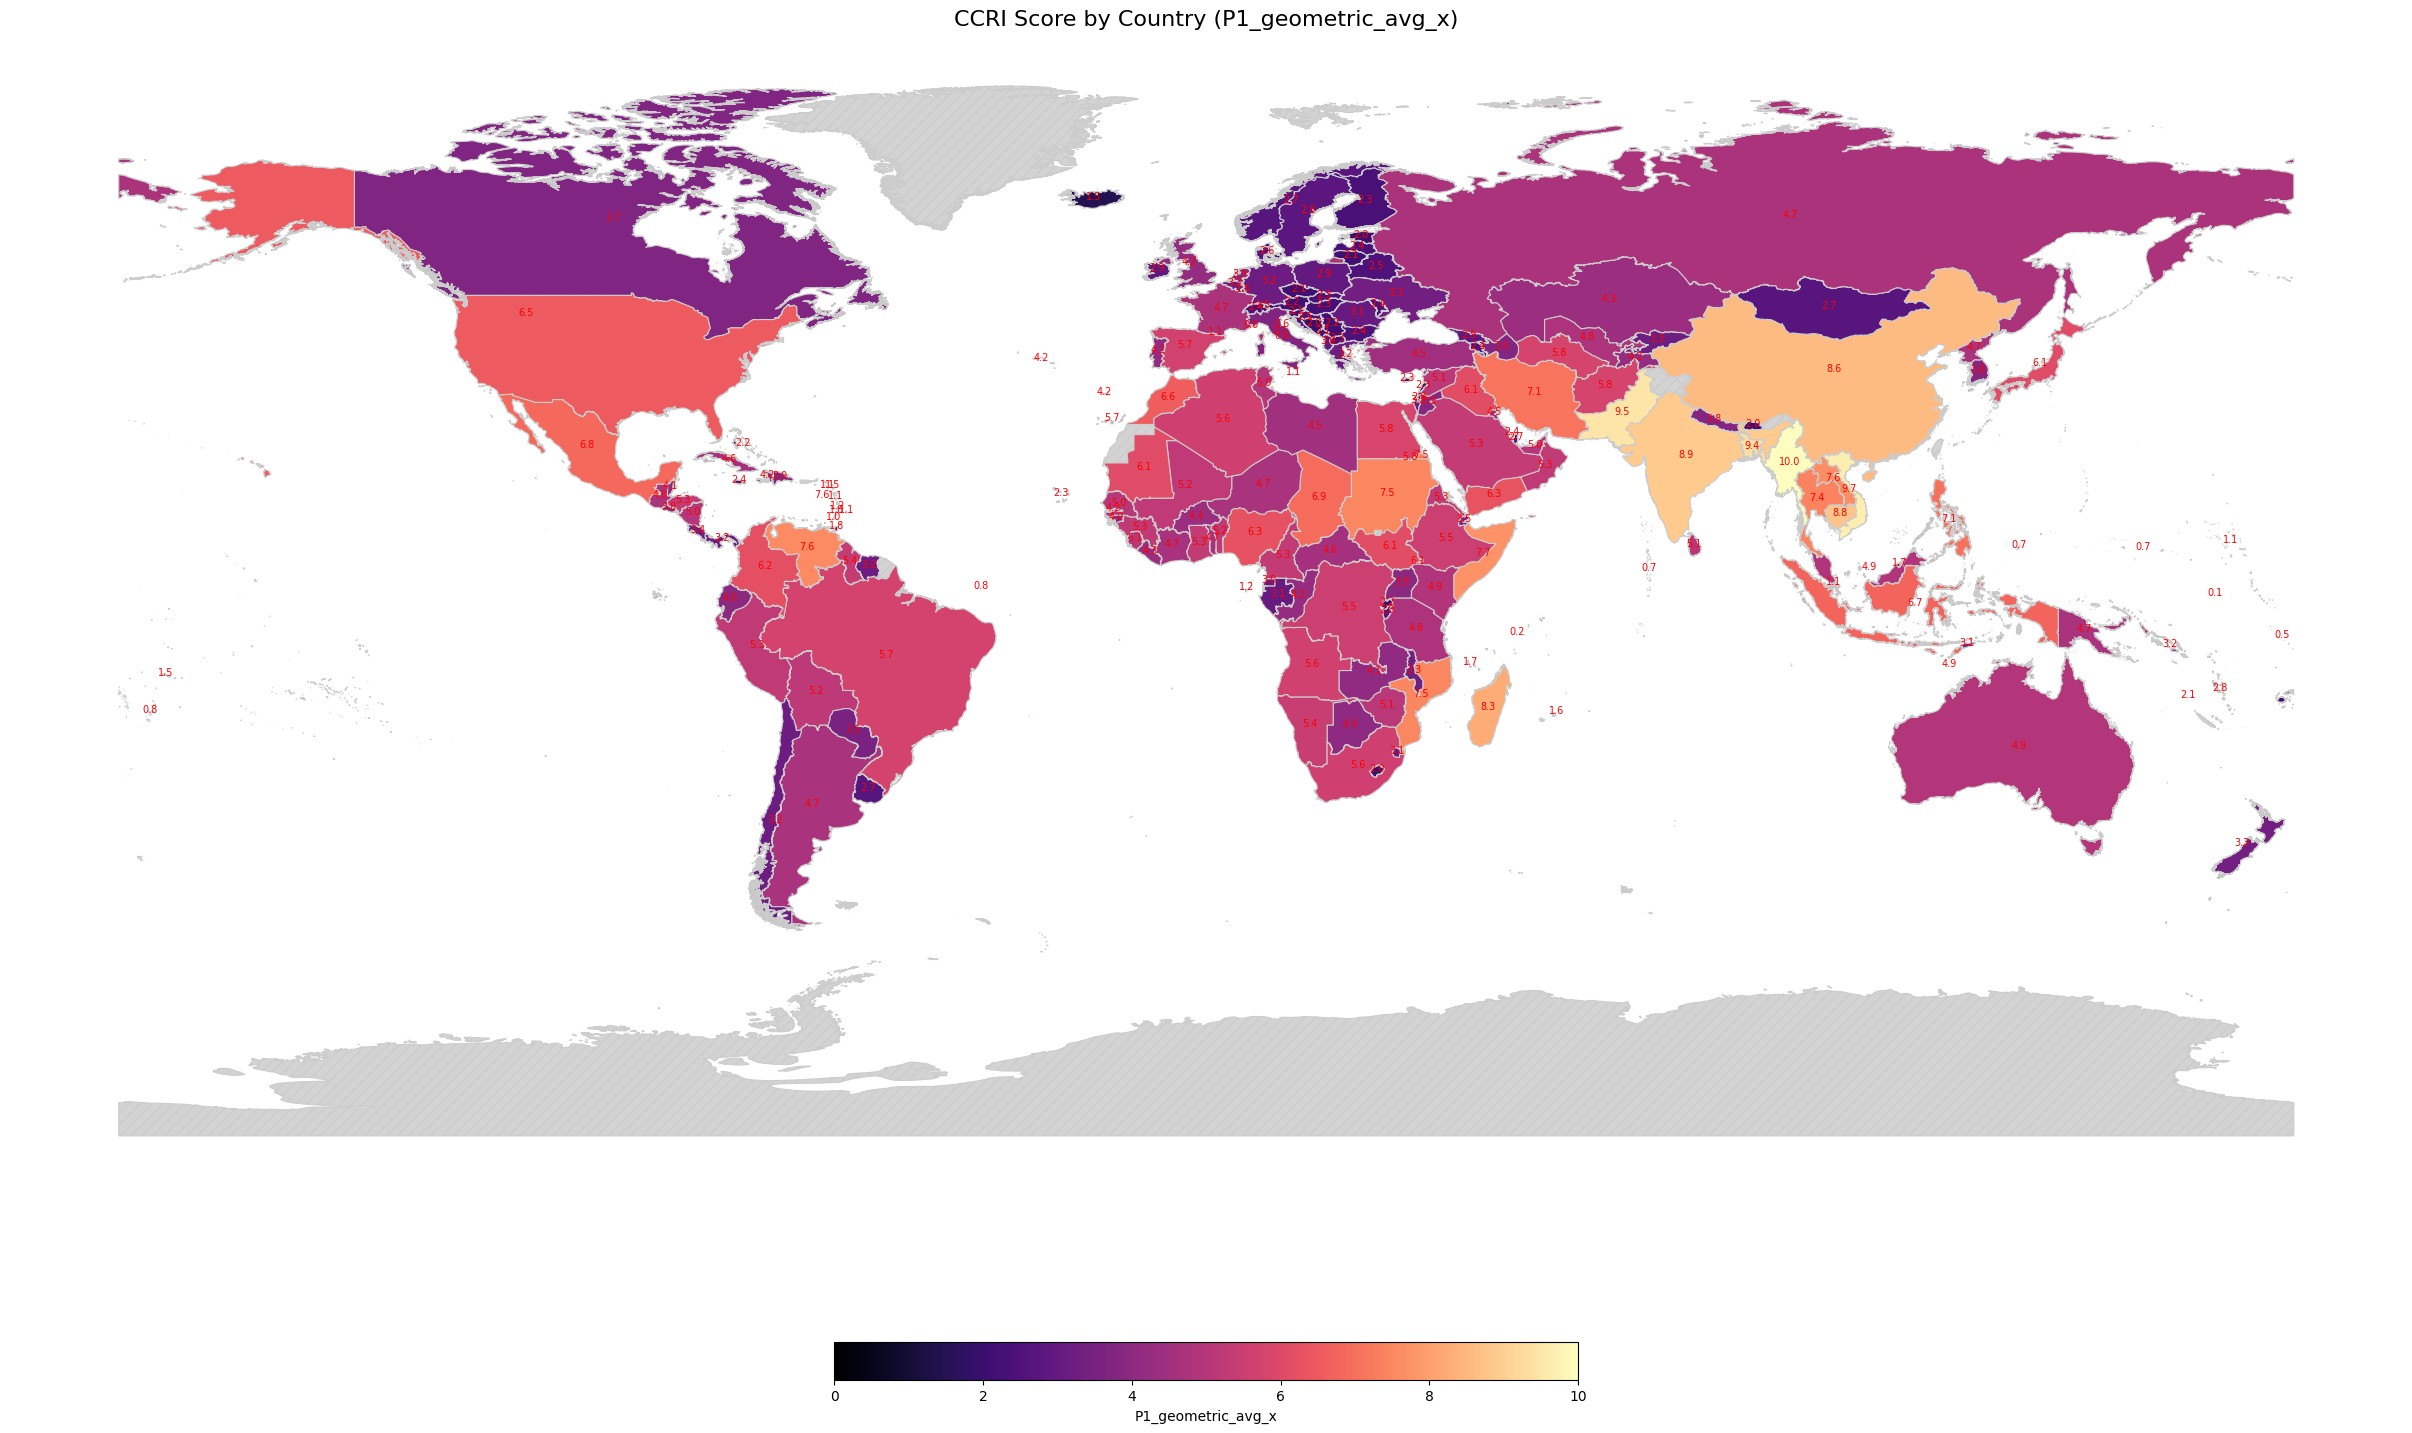

In [25]:
# Attempt to read and plot assuming the file now exists and has 'P1_P2_geometric_avg' column
import geopandas as gpd
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots(1, 1, figsize=(32, 20))
merged_geo_df.plot(
    column='P1_geometric_avg_x',
    cmap='magma',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'shrink': 0.3,      # Reduce legend size
        'label': "P1_geometric_avg_x",
        'orientation': "horizontal",
        'pad': 0.1
    },
    missing_kwds={
        'color': 'lightgray',       # Fill color for NaN
        'edgecolor': '0.8',         # Edge color for NaN polygons
        'hatch': '///',             # Optional: add pattern to differentiate
        'label': 'No data'
    }
)

# Add labels
for idx, row in merged_geo_df.iterrows():
    if pd.notnull(row['P1_geometric_avg_x']):
        centroid = row['geometry'].centroid
        ax.annotate(text=f"{row['P1_geometric_avg_x']:.1f}", xy=(centroid.x, centroid.y),
                    horizontalalignment='center', fontsize=7, color='red')

plt.title('CCRI Score by Country (P1_geometric_avg_x)', fontsize=16)
plt.axis('off')
plt.show()



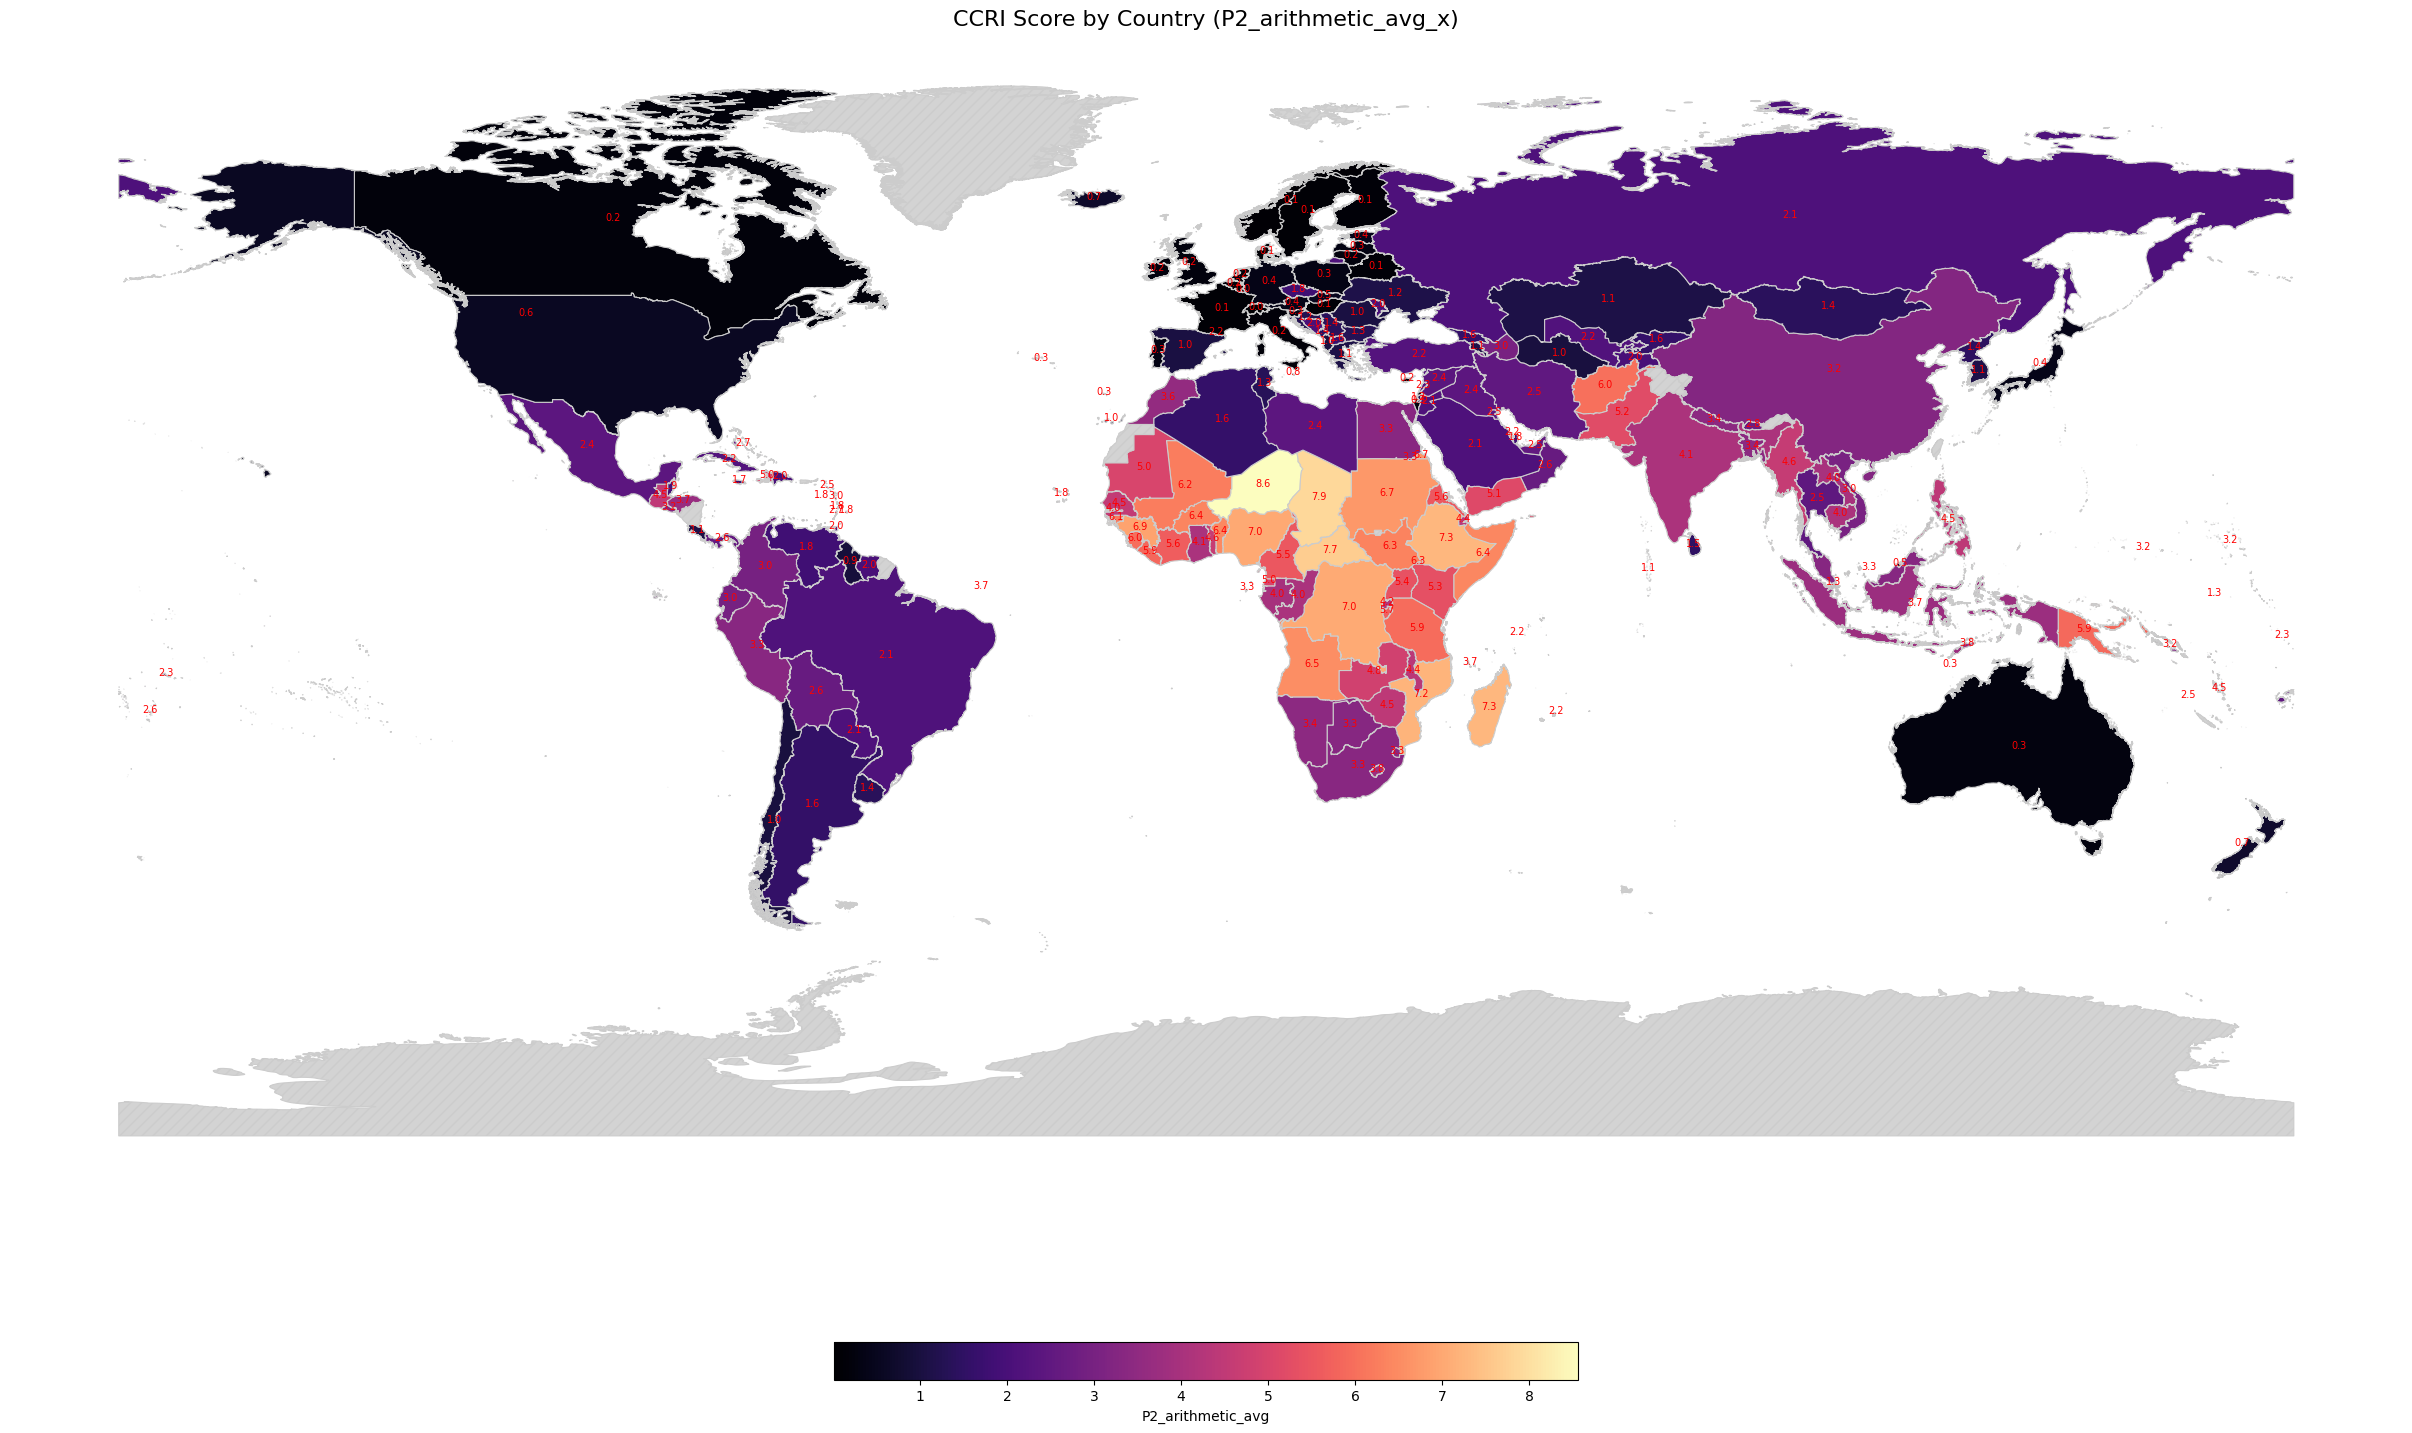

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

fig, ax = plt.subplots(1, 1, figsize=(32, 20))
merged_geo_df.plot(
    column='P2_arithmetic_avg_x',
    cmap='magma',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'shrink': 0.3,
        'label': "P2_arithmetic_avg",
        'orientation': "horizontal",
        'pad': 0.1
    },
    missing_kwds={
        'color': 'lightgray',      # Fill color for NaN
        'edgecolor': '0.8',
        'hatch': '///',            # Optional pattern
        'label': 'No data'
    }
)

# Add labels for valid values
for idx, row in merged_geo_df.iterrows():
    if pd.notnull(row['P2_arithmetic_avg_x']):
        centroid = row['geometry'].centroid
        ax.annotate(
            text=f"{row['P2_arithmetic_avg_x']:.1f}",
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=7,
            color='red'
        )

plt.title('CCRI Score by Country (P2_arithmetic_avg_x)', fontsize=16)
plt.axis('off')
plt.show()
